In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moyal
from scipy.stats import skew
from scipy import integrate
import timeit

In [16]:
T_i = 150*1.602e-13
r_e = 2.8179e-15
m_e = 9.1094e-31
c = 3e8
m_p = 1.6726e-27
Énergie_moyenne_excitation_eau = 75*1.602e-19
Énergie_moyenne_excitation_os = 91.9*1.602e-19
rho_eau = 997
rho_os = 1850
def densité_électronique(composition_atomique, masse_volumique):
    nbr_électrons_volumique = 0
    avogadro = 6.022e23
    masse_atomique = {1: 0.001007975, 6: 0.0120106, 7: 0.014006855, 8: 0.0159940, 12: 0.0243055, 15: 0.03097396200, 16: 0.0320675, 20: 0.040078} 
    for x in composition_atomique:
        nbr_électrons_volumique += masse_volumique * x[1] * avogadro * x[0] / masse_atomique[x[0]]
    return nbr_électrons_volumique
eau = [(1, 0.111894), (8, 0.888106)]
densité_électronique_eau = densité_électronique(eau, 997)
os = [(1,0.063984), (6,0.278000), (7,0.027000), (8,0.410016), (12,0.002), (15,0.07), (16,0.002), (20,0.147)]
densité_électronique_os = densité_électronique(os, 1850)
def f_eau(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau)**2))-2*(Beta**2))
    return 1/S_col_eau
def f_os(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_os)**2))-2*(Beta**2))
    # print(type(T))
    return 1/S_col_os


[150.         149.84984985 149.6996997  149.54954955 149.3993994
 149.24924925 149.0990991  148.94894895 148.7987988  148.64864865
 148.4984985  148.34834835 148.1981982  148.04804805 147.8978979
 147.74774775 147.5975976  147.44744745 147.2972973  147.14714715
 146.996997   146.84684685 146.6966967  146.54654655 146.3963964
 146.24624625 146.0960961  145.94594595 145.7957958  145.64564565
 145.4954955  145.34534535 145.1951952  145.04504505 144.89489489
 144.74474474 144.59459459 144.44444444 144.29429429 144.14414414
 143.99399399 143.84384384 143.69369369 143.54354354 143.39339339
 143.24324324 143.09309309 142.94294294 142.79279279 142.64264264
 142.49249249 142.34234234 142.19219219 142.04204204 141.89189189
 141.74174174 141.59159159 141.44144144 141.29129129 141.14114114
 140.99099099 140.84084084 140.69069069 140.54054054 140.39039039
 140.24024024 140.09009009 139.93993994 139.78978979 139.63963964
 139.48948949 139.33933934 139.18918919 139.03903904 138.88888889
 138.73873874

C:\Users\lbstc\AppData\Local\Temp\ipykernel_7044\949154510.py:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  distances.append((integrate.quad(f_os, (lin[x-1])*1.602e-13, (lin[x])*1.602e-13))[0])


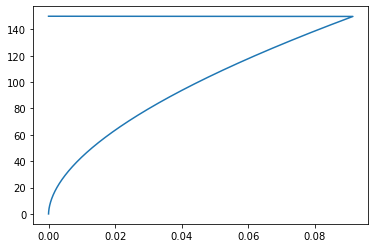

In [40]:
distances = []
distances2 = []
énergie = []
lin = np.linspace(150,0,1000)
for x in range(len(lin)):
    distances.append((integrate.quad(f_os, (lin[x-1])*1.602e-13, (lin[x])*1.602e-13))[0])
    énergie.append(x)
for x in range(len(distances)):
    distances2.append(sum(distances[:x]))

# print(distances2)
print(lin)
plt.plot(distances2, lin)
plt.show()
